In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

In [2]:
# df = pd.read_json('airlines-1558527599826.json', orient = 'records', lines = True)

In [225]:
# date_parser = pd.to_datetime
df = pd.read_csv('Full_basic.csv',usecols=['timestamp_ms','lang'],error_bad_lines=False)
df['created_at'] = pd.to_datetime(df['timestamp_ms'], unit = 'ms')

C:\Users\philipp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h2>Distribution of calendar days:

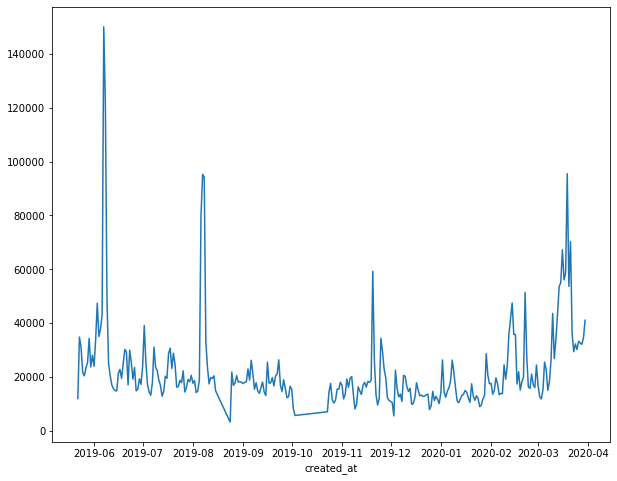

In [241]:
df['created_at'].dt.date.groupby(df['created_at'].dt.date).count().plot(figsize=(10,8))

<h2>Distribution of week days:

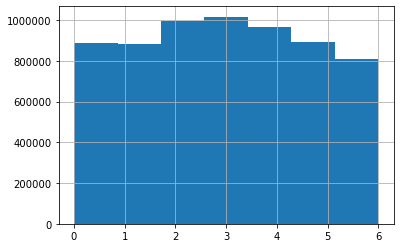

In [245]:
df['created_at'].dt.weekday.hist(bins=7)

<h2>Distribution of hours of day:

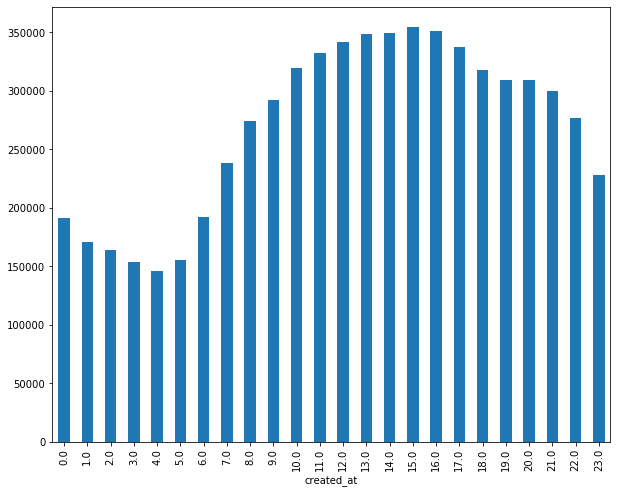

In [229]:
df['created_at'].dt.hour.groupby(df['created_at'].dt.hour).count().plot(kind='bar',figsize=(10,8))

<h2>Distribution per language:

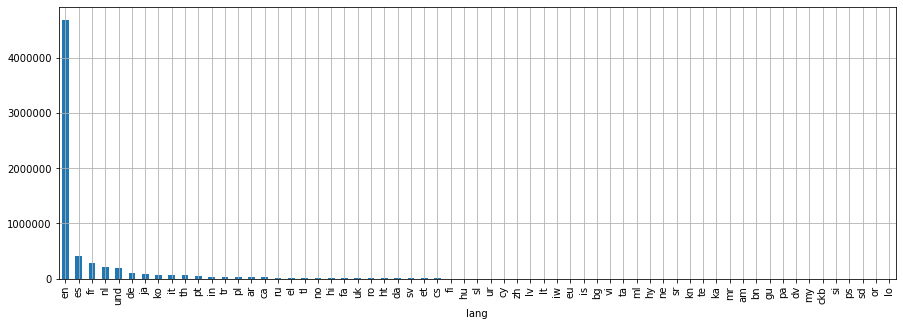

In [230]:
df['lang'].groupby(by=df['lang']).count().sort_values(ascending =False).plot(kind='bar',figsize=(15,5),grid=True)

<h2>Distribution of tweets per conversation:

In [246]:
def len_lookup(tweets):
    length=0
    for x in tweets:
        if isinstance(x, int):
            length+=1
        else:
            length+=len_lookup(x)
    return length
    
len_list=np.zeros(len(np_conv), dtype='int32')
index=0
for x in np_conv:
    len_list[index]=len_lookup(x[0])
    index+=1

In [250]:
with open('@KLM_conve.txt') as f:
    content = f.readlines()
content = [x.strip() for x in content]
content=[ast.literal_eval(x) for x in content]
np_conv=np.array([[x] for x in content])
df_len=pd.DataFrame(len_list)

In [256]:
df_len.describe()

,0
count,1001.000000
mean,4.430569
std,4.614263
min,2.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,54.000000


(0, 145)

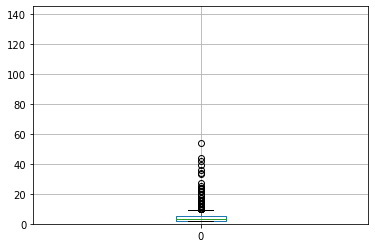

In [251]:
axes = df_len.boxplot()
axes.set_ylim(0, 145)

In [252]:
with open('@British_Airways_conve.txt') as f:
    content = f.readlines()
content = [x.strip() for x in content]
content=[ast.literal_eval(x) for x in content]
np_conv=np.array([[x] for x in content])
df_len=pd.DataFrame(len_list)

In [254]:
df_len.describe()

,0
count,1001.000000
mean,4.430569
std,4.614263
min,2.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,54.000000


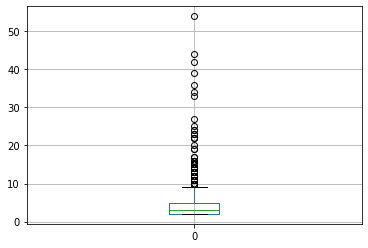

In [255]:
df_len.boxplot()

<h2>Distribution of tweets per user: